> 해당 블로그를 참고하여 작성하였습니다.

> https://rise.cs.berkeley.edu/blog/ray-tips-for-first-time-users/

In [6]:
import time
import random

import numpy as np
import ray

In [2]:
def do_some_work(x):
    time.sleep(1)
    return x

start = time.time()
results = [do_some_work(x) for x in range(4)]
print("Elapsed time: {} s".format(time.time() - start))

Elapsed time: 4.004568099975586 s


In [3]:
ray.init(num_cpus=2)

@ray.remote
def do_some_work(x):
    time.sleep(1)
    return x

start = time.time()
results = ray.get([do_some_work.remote(x) for x in range(4)])
print("Elapsed time: {} s".format(time.time() - start))

2023-05-09 05:15:34,607	WARNING services.py:1816 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=0.59gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2023-05-09 05:15:35,243	INFO worker.py:1625 -- Started a local Ray instance.


Elapsed time: 2.0450427532196045 s


In [3]:
ray.shutdown()

In [4]:
ray.init(num_cpus=2)

@ray.remote
def tiny_work(x):
    time.sleep(0.0001)
    return x

start = time.time()
result_ids = [tiny_work.remote(x) for x in range(100000)]
results = ray.get(result_ids)

print("Elapsed time: {} s".format(time.time() - start))    

2023-05-09 05:20:00,560	WARNING services.py:1816 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=0.69gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2023-05-09 05:20:00,731	INFO worker.py:1625 -- Started a local Ray instance.
2023-05-09 05:20:23,857	WARNING worker.py:1986 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: c8d2ee93b729a86b4b1249c53902435244d9b35001000000 Worker ID: 501b8b7a76c1e9bb5ed8ee405cf17a0fa76500ead845c12864527b69 Node ID: 91398ab45fcbf7861cf4046e1a1b2ab9a0a1b171808576c2b33048fa Worker IP address: 172.16.5.4 Worker port

: 

: 

In [ ]:
def tiny_work(x):
    time.sleep(0.0001)
    return x

@ray.remote
def mega_work(start, end):
    return [tiny_work(x) for x in range(start, end)]

start = time.time()
result_ids = [mega_work.remote(x, x + 10000) for x in range(0, 100000, 10000)]
results = ray.get(result_ids)
print("Elapsed time: {} s".format(time.time() - start))

In [3]:
ray.init(num_cpus=2)

@ray.remote
def no_work(x):
    return x

start = time.time()
num_calls = 1000

[ray.get(no_work.remote(0)) for x in range(num_calls)]
print("per task overhead (ms) =", (time.time() - start) * 1000/num_calls)


2023-05-09 05:24:52,303	WARNING services.py:1816 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=0.57gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2023-05-09 05:24:52,381	INFO worker.py:1625 -- Started a local Ray instance.


per task overhead (ms) = 2.1370298862457275


In [4]:
@ray.remote
def no_work_2(a):
    return a

start = time.time()
a = np.zeros((10000, 2000))

result_ids = [no_work.remote(a) for x in range(10)]
results = ray.get(result_ids)
print("Elapsed time: {} s".format(time.time() - start))

2023-05-09 05:26:44,108	WARNING worker.py:1986 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: 6600f5ae58c466c0970c4f0b519e614eb86c897301000000 Worker ID: e0016772d9be12b289054bb8d617801374dd3ccbe1d05aa4b93503eb Node ID: 4dea75473852cbcaab5f2e2aa405176e15660b82e908d20c7d64d7db Worker IP address: 172.16.5.4 Worker port: 46213 Worker PID: 19743 Worker exit type: SYSTEM_ERROR Worker exit detail: Worker unexpectedly exits with a connection error code 2. End of file. There are some potential root causes. (1) The process is killed by SIGKILL by OOM killer due to high memory usage. (2) ray stop --force is called. (3) The worker is crashed unexpectedly due to SIGSEGV or other unexpected errors.
2023-05-09 05:26:55,950	WARNING worker.py:1986 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead w

(autoscaler +2m30s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +2m30s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(raylet) Spilled 2136 MiB, 14 objects, write throughput 75 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) [2023-05-09 05:27:40,770 E 19664 19664] (raylet) worker_pool.cc:537: Some workers of the worker process(20443) have not registered within the timeout. The process is dead, probably it crashed during start.


Elapsed time: 94.9829933643341 s


In [7]:
@ray.remote 
def do_some_work(x): 
    time.sleep(random.uniform(0, 4)) # Replace this with work you need to do. 
    return x 

def process_results(results): 
    sum = 0 
    for x in results: 
        time.sleep(1) # Replace this with some processing code. 
        sum += x 
    return sum 

start = time.time() 
data_list = ray.get([do_some_work.remote(x) for x in range(4)]) 
sum = process_results(data_list) 
print("duration =", time.time() - start, "\nresult = ", sum) 

duration = 9.663014650344849 
result =  6


In [8]:
@ray.remote 
def do_some_work(x): 
    time.sleep(random.uniform(0, 4)) # Replace this with work you need to do. 
    return x 

def process_incremental(sum, result): 
    time.sleep(1) # Replace this with some processing code. 
    return sum + result 

start = time.time() 
result_ids = [do_some_work.remote(x) for x in range(4)] 
sum = 0 
while len(result_ids): 
    done_id, result_ids = ray.wait(result_ids) 
    sum = process_incremental(sum, ray.get(done_id[0])) 
print("duration =", time.time() - start, "\nresult = ", sum) 

duration = 6.248197078704834 
result =  6


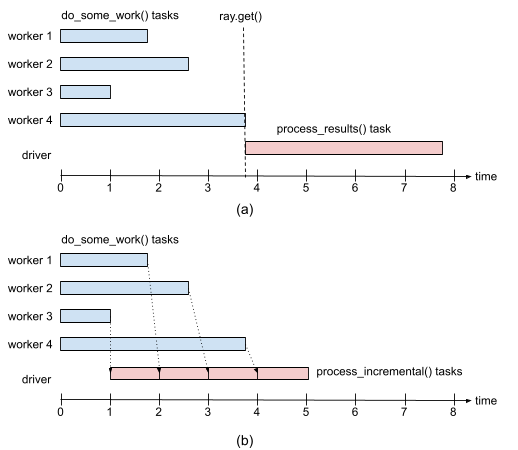